# Caltech-UCSD Birds-200-2011 (CUB) - Reader Writer class

## Imports

In [1]:
import numpy as np
import os
import csv
import cv2
import sys
import pandas as pd
from pandas import DataFrame
from PIL import Image
from matplotlib import pyplot as plt
import pprint
from cub_read_write_class  import CUB_ReadWrite  #importing our class

## Globals

In [2]:
CUB_PATH = "../../CUB_200_2011/"
CSV_PATH = "cub_csv.csv"
PROCESS_CUB = True

## Helpers (functions for the demo only)

In [3]:
# demo - use python inheritnce to extend the class with own functions
class CUB_ReadWrite(CUB_ReadWrite):
    def path(self):
        return self.cubPath
        
# read csv file into pandas dataframe
def getCsv(csvPath):
    csvData =  pd.read_csv(csvPath)
    return csvData

# return first top items from a dictionary
def head(d, top):
    return dict(list(d.items())[0:top-1])

# return image with bounding box, class title, image size & box size from csv row 
def draw_box(csvRow):
    img = cv2.imread(csvRow['filename'])
    img = cv2.rectangle(img, (csvRow['xmin'], csvRow['ymin']), (csvRow['xmax'], csvRow['ymax']), (0, 0, 0), 1)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img,csvRow['class'],(csvRow['xmin'],csvRow['ymin']), font, 0.5,(255,255,255),1)
    cv2.putText(img,str(csvRow['width'])+"x"+str(csvRow['height']),(0,csvRow['height']), font, 0.4,(255,255,255),1)
    cv2.putText(img,str(csvRow['b-width'])+"x"+str(csvRow['b-height']),(csvRow['xmin'],csvRow['ymax']), font, 0.3,(255,255,255),1)
    return img

#display images from csv rows collection (dataset) 
def showCsvImages(csvRows):
    for idx in range(len(csvRows.index)):
        row = csvRows.iloc[idx]
        pilImage = Image.fromarray(cv2.cvtColor(draw_box(row),cv2.COLOR_BGR2RGB))
        display(pilImage)

## CUB read write class (display the class source here for clarity only)

In [4]:
# display see class source (only on a real notebook browser session not rendered by github)
%pycat cub_read_write_class.py

## Usage sample
- init class object
- print CUB methods data (for demo only)
- write data into the csv file
- read CUB csv file
- debug print 10 lines header
- display sample image (by number) with bounding box and class as title

In [5]:
if (PROCESS_CUB):   # enables reloading the notebook wothout reading the data (csv read mode only)
    try:
        cub = CUB_ReadWrite(CUB_PATH)         # initialize class object cub
    except ValueError as e:
        print("error in class constructor: ",e)
        sys.exit()
    
    # this part is class methods demo (prints the class methods returned data) 
    # ---------------------------------------------------------------------------------------------------
    print("CUB path:")
    pprint.pprint(cub.path())
    print("CUB data sizes (images,classes):")
    print(cub.getCubSize())                      # CUB records (int)
    print("CUB imagefiles (top 10):")
    pprint.pprint(head(cub.getImages(),10))      # images path (dict - {id : path})
    print("CUB images sizes (top 10):")
    pprint.pprint(head(cub.getImagesSizes(),10)) # images sizes (dict - {id : [width,height]})
    print("CUB images classes ids (top 10):")
    pprint.pprint(head(cub.getImgClasses(),10))  # images class id (dict - {id : class id} )
    print("CUB image bounding boxes (top 10):")
    pprint.pprint(head(cub.getBoxes(),10))       # images boxes(dict - {id : [xmin, ymin, width, height]})
    print("CUB classes names (top 10):")
    pprint.pprint(head(cub.getClasses(),10))     # CUB class names (dict - {id : class name})
    # --------------------------------------------------------------------------------------------------
    
    cub.writeCubToCsv(CSV_PATH)           # write CUB data to the csv file
    del(cub)                              # delete cub object
    

CUB path:
'../../CUB_200_2011/'
CUB data sizes (images,classes):
(11788, 200)
CUB imagefiles (top 10):
{1: '../../CUB_200_2011/images\\001.Black_footed_Albatross/Black_Footed_Albatross_0046_18.jpg',
 2: '../../CUB_200_2011/images\\001.Black_footed_Albatross/Black_Footed_Albatross_0009_34.jpg',
 3: '../../CUB_200_2011/images\\001.Black_footed_Albatross/Black_Footed_Albatross_0002_55.jpg',
 4: '../../CUB_200_2011/images\\001.Black_footed_Albatross/Black_Footed_Albatross_0074_59.jpg',
 5: '../../CUB_200_2011/images\\001.Black_footed_Albatross/Black_Footed_Albatross_0014_89.jpg',
 6: '../../CUB_200_2011/images\\001.Black_footed_Albatross/Black_Footed_Albatross_0085_92.jpg',
 7: '../../CUB_200_2011/images\\001.Black_footed_Albatross/Black_Footed_Albatross_0031_100.jpg',
 8: '../../CUB_200_2011/images\\001.Black_footed_Albatross/Black_Footed_Albatross_0051_796103.jpg',
 9: '../../CUB_200_2011/images\\001.Black_footed_Albatross/Black_Footed_Albatross_0010_796097.jpg'}
CUB images sizes (top 10

In [6]:
csvData = getCsv(CSV_PATH)    # read csv file into csvData object
csvData.head(10)              # show first 10 lines

,filename,width,height,class,xmin,ymin,xmax,ymax,centerx,centery,b-width,b-height
0,../../CUB_200_2011/images\001.Black_footed_Alb...,500,335,001.Black_footed_Albatross,60,27,385,331,222,179,325,304
1,../../CUB_200_2011/images\001.Black_footed_Alb...,500,336,001.Black_footed_Albatross,139,30,292,294,215,162,153,264
2,../../CUB_200_2011/images\001.Black_footed_Alb...,500,347,001.Black_footed_Albatross,14,112,402,298,208,205,388,186
3,../../CUB_200_2011/images\001.Black_footed_Alb...,415,500,001.Black_footed_Albatross,112,90,367,332,239,211,255,242
4,../../CUB_200_2011/images\001.Black_footed_Alb...,331,380,001.Black_footed_Albatross,70,50,204,353,137,201,134,303
5,../../CUB_200_2011/images\001.Black_footed_Alb...,500,470,001.Black_footed_Albatross,33,53,284,448,158,250,251,395
6,../../CUB_200_2011/images\001.Black_footed_Alb...,500,340,001.Black_footed_Albatross,7,75,427,337,217,206,420,262
7,../../CUB_200_2011/images\001.Black_footed_Alb...,500,391,001.Black_footed_Albatross,78,86,411,244,244,165,333,158
8,../../CUB_200_2011/images\001.Black_footed_Alb...,500,416,001.Black_footed_Albatross,112,76,333,265,222,170,221,189
9,../../CUB_200_2011/images\001.Black_footed_Alb...,250,208,001.Black_footed_Albatross,27,4,226,205,126,104,199,201


Found 5 records:


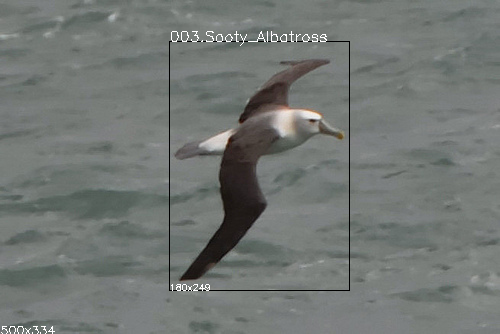

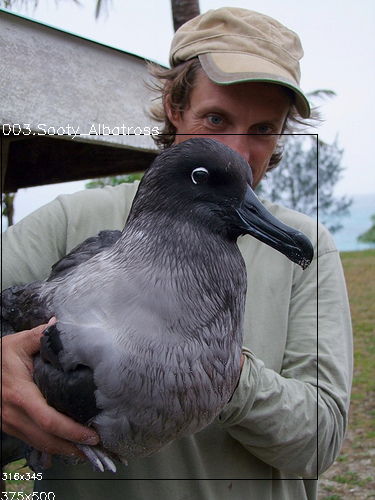

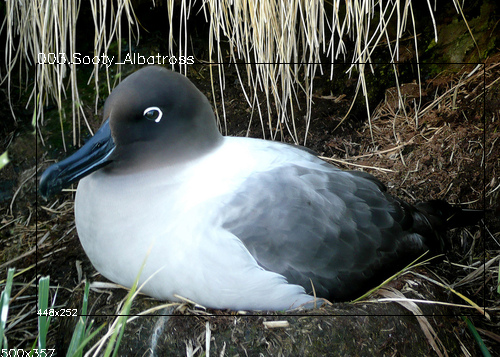

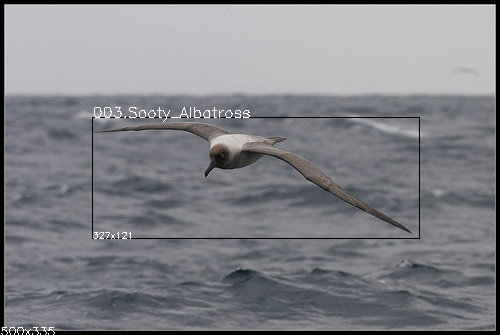

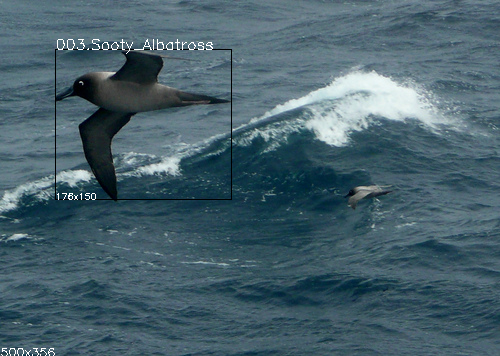

In [7]:
# query csv dataframe display each, including bounding box and class as title
# (uncomment for different queries samples)

#query by partial class name
#csvRows = csvData[csvData['class'].str.contains("Pelican")]

# query by image numbers
csvRows = csvData.iloc[123:128]

# query by iamge size
#csvRows = csvData[(csvData['width'] < 500) & (csvData['height'] < 400)] 

found = len(csvRows.index)
if (found > 0):
    print ("Found {} records:".format(found)) 
    showCsvImages(csvRows)
else:
    print ("No records found")